In [144]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Noush\Downloads\movies.csv')
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [32]:
#missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [33]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [147]:
#change data type 

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')
df['votes'] = df['votes'].astype('Int64')




<Axes: >

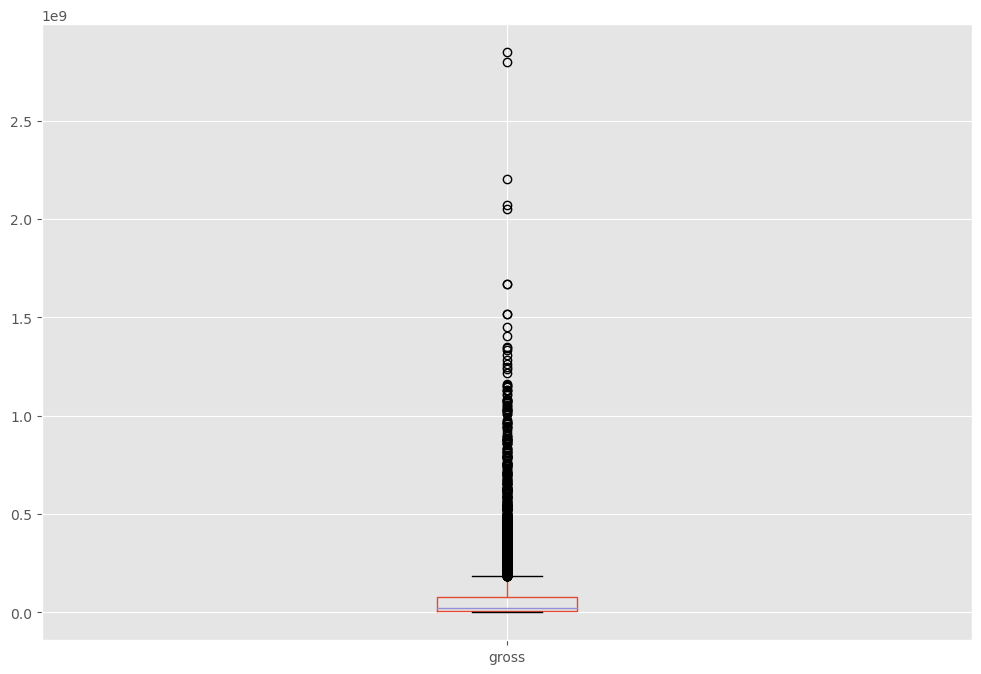

In [145]:
# Are there any Outliers?

df.boxplot(column=['gross'])


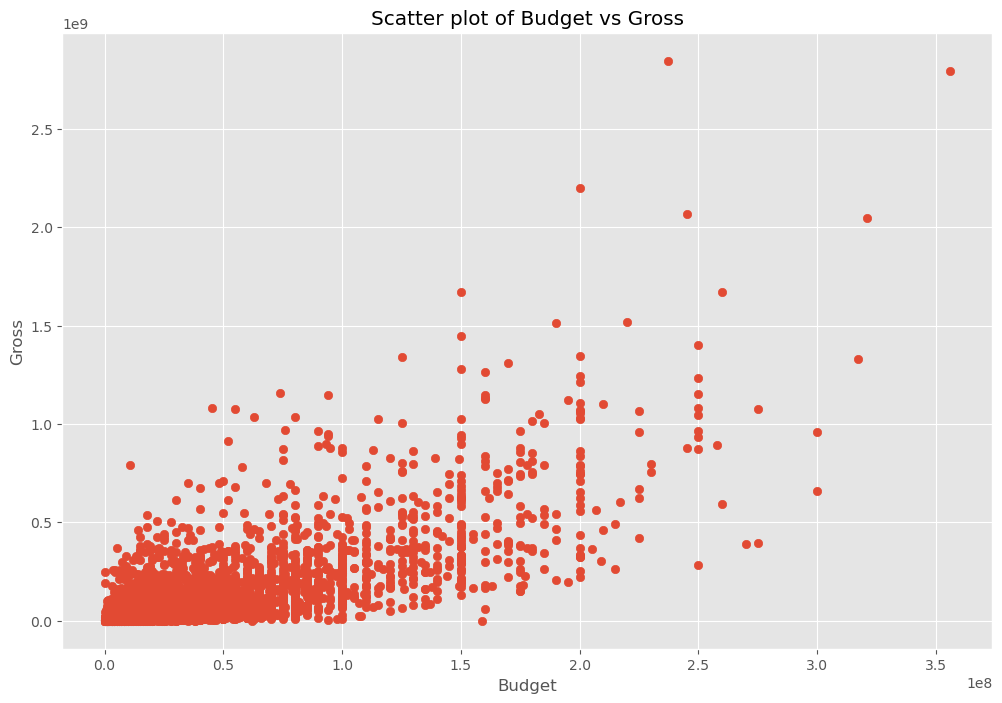

In [97]:
#scatterplot budget vs gross
plt.scatter(x=df['budget'] , y=df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Scatter plot of Budget vs Gross')
plt.show()


In [106]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 



<Axes: xlabel='gross', ylabel='budget'>

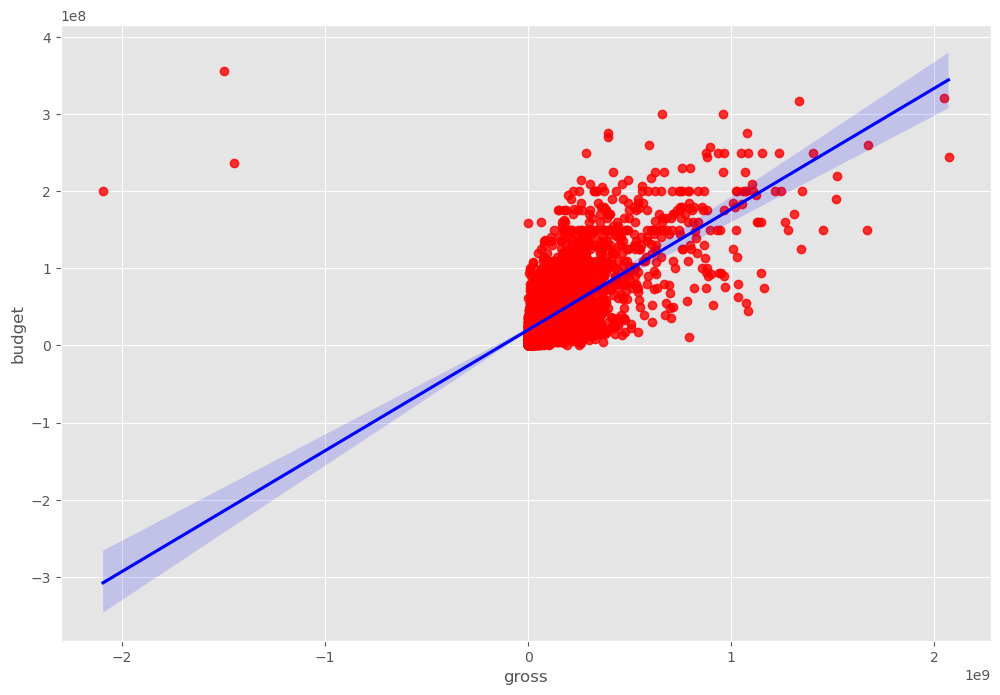

In [107]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={ 'color':'red' },line_kws={ 'color':'blue' })

In [115]:

# Compute correlations for multiple columns
multiple_corr = df[['budget', 'gross', 'runtime', 'year', 'votes', 'score']].corr()

print("Correlation:")
print(multiple_corr)

Correlation:
           budget     gross   runtime      year     votes     score
budget   1.000000  0.688020  0.318595  0.327781  0.440021  0.071792
gross    0.688020  1.000000  0.231880  0.273091  0.565879  0.206177
runtime  0.318595  0.231880  1.000000  0.074203  0.352437  0.414580
year     0.327781  0.273091  0.074203  1.000000  0.205758  0.055174
votes    0.440021  0.565879  0.352437  0.205758  1.000000  0.473809
score    0.071792  0.206177  0.414580  0.055174  0.473809  1.000000


In [118]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Handle missing values, if necessary
# For example, you can drop rows with missing values:
df_numeric = df.select_dtypes(include=['number']).dropna()

# Compute Pearson correlation coefficients for numeric columns
pearson_corr = df_numeric.corr(method='pearson')

print("Pearson correlation coefficients:")
print(pearson_corr)

Non-numeric columns: Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')
Pearson correlation coefficients:
             year     score     votes    budget     gross   runtime
year     1.000000  0.055391  0.205852  0.327793  0.273180  0.074203
score    0.055391  1.000000  0.473789  0.071821  0.206132  0.414580
votes    0.205852  0.473789  1.000000  0.440035  0.565868  0.352437
budget   0.327793  0.071821  0.440035  1.000000  0.688034  0.318595
gross    0.273180  0.206132  0.565868  0.688034  1.000000  0.231880
runtime  0.074203  0.414580  0.352437  0.318595  0.231880  1.000000


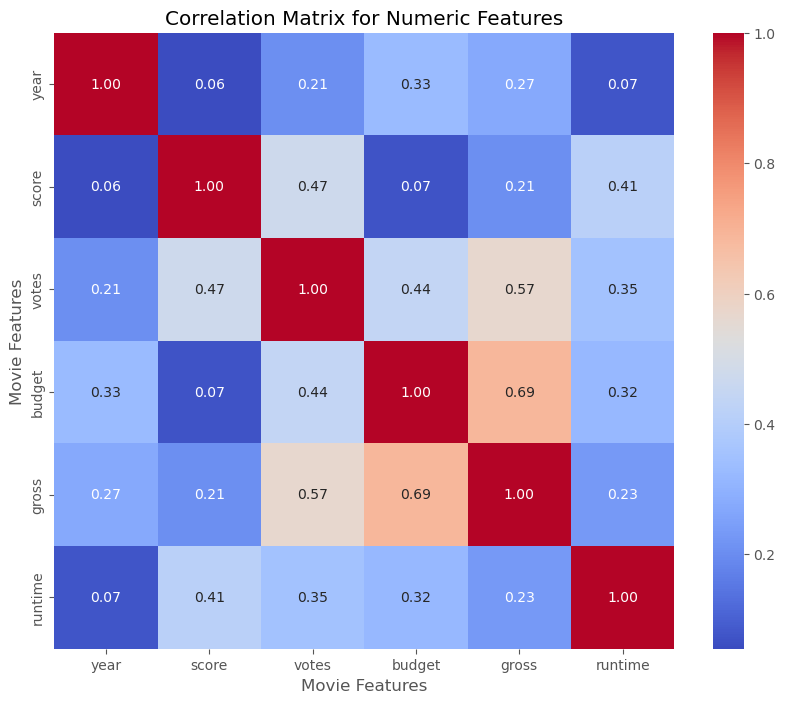

In [126]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr('pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [132]:
# Using factorize - this assigns a random numeric value for each unique categorical value


df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.170525,0.028171,0.965587,0.966197,-0.020646,0.295174,0.725025,0.792244,0.694961,0.096024,0.288374,0.968021,0.535803,0.048827
rating,0.170525,1.000000,-0.116178,0.180042,0.171822,0.035605,0.096117,0.096252,0.128937,0.116250,-0.006310,0.203558,0.173484,-0.027431,0.031162
genre,0.028171,-0.116178,1.000000,0.031367,0.030976,-0.025599,-0.011119,0.037281,0.033239,0.045507,-0.003864,0.019690,0.031790,0.014914,-0.001004
year,0.965587,0.180042,0.031367,1.000000,0.996545,-0.015213,0.321913,0.747431,0.812066,0.719185,0.092980,0.318446,0.996425,0.538226,0.055788
released,0.966197,0.171822,0.030976,0.996545,1.000000,-0.020044,0.311206,0.750442,0.809574,0.719860,0.094779,0.309055,0.998495,0.546430,0.049517
score,-0.020646,0.035605,-0.025599,-0.015213,-0.020044,1.000000,-0.041147,-0.006937,-0.021886,0.014536,0.015834,-0.006565,-0.016319,-0.009526,0.011966
votes,0.295174,0.096117,-0.011119,0.321913,0.311206,-0.041147,1.000000,0.186192,0.222795,0.180747,-0.021462,0.357144,0.305221,0.006947,0.126941
director,0.725025,0.096252,0.037281,0.747431,0.750442,-0.006937,0.186192,1.000000,0.717746,0.636307,0.092258,0.122981,0.751338,0.483803,-0.028189
writer,0.792244,0.128937,0.033239,0.812066,0.809574,-0.021886,0.222795,0.717746,1.000000,0.626436,0.096554,0.206982,0.811078,0.478208,0.022266
star,0.694961,0.116250,0.045507,0.719185,0.719860,0.014536,0.180747,0.636307,0.626436,1.000000,0.096755,0.137562,0.720568,0.442086,0.032695


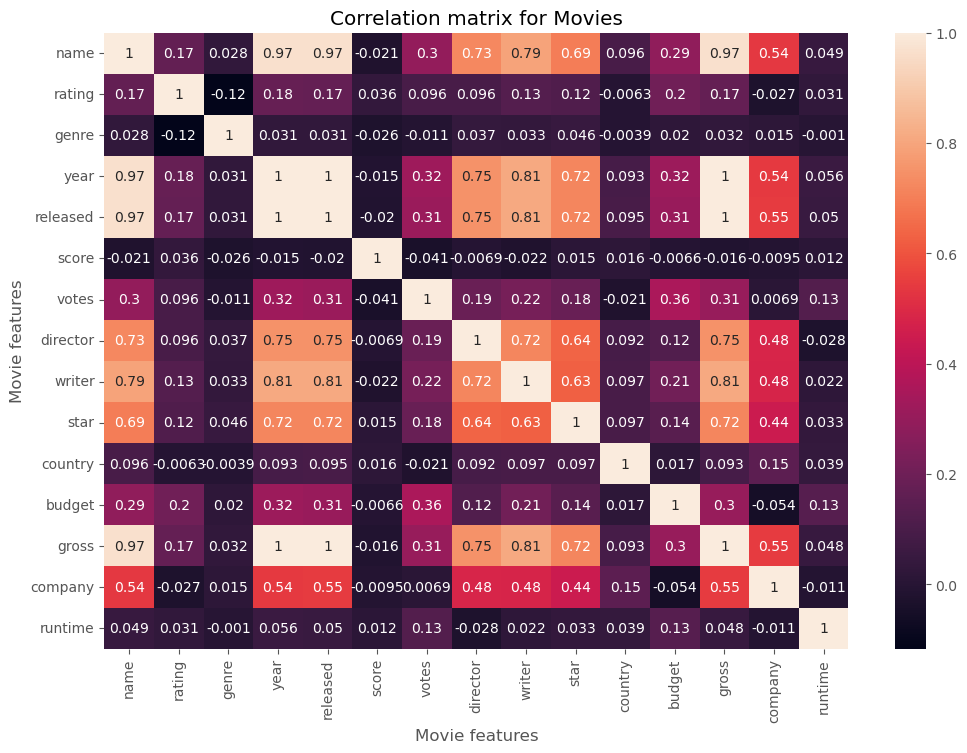

In [133]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [136]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.170525
          genre       0.028171
          year        0.965587
          released    0.966197
          score      -0.020646
          votes       0.295174
          director    0.725025
          writer      0.792244
          star        0.694961
          country     0.096024
          budget      0.288374
          gross       0.968021
          company     0.535803
          runtime     0.048827
rating    name        0.170525
          rating      1.000000
          genre      -0.116178
          year        0.180042
          released    0.171822
          score       0.035605
          votes       0.096117
          director    0.096252
          writer      0.128937
          star        0.116250
          country    -0.006310
          budget      0.203558
          gross       0.173484
          company    -0.027431
          runtime     0.031162
genre     name        0.028171
          rating     -0.116178
        

In [137]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre     rating     -0.116178
rating    genre      -0.116178
budget    company    -0.053959
company   budget     -0.053959
score     votes      -0.041147
votes     score      -0.041147
runtime   director   -0.028189
director  runtime    -0.028189
company   rating     -0.027431
rating    company    -0.027431
score     genre      -0.025599
genre     score      -0.025599
writer    score      -0.021886
score     writer     -0.021886
votes     country    -0.021462
country   votes      -0.021462
name      score      -0.020646
score     name       -0.020646
released  score      -0.020044
score     released   -0.020044
          gross      -0.016319
gross     score      -0.016319
score     year       -0.015213
year      score      -0.015213
runtime   company    -0.011316
company   runtime    -0.011316
genre     votes      -0.011119
votes     genre      -0.011119
company   score      -0.009526
score     company    -0.009526
          director   -0.006937
director  score      -0.006937
score   

In [138]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   name        0.535803
name      company     0.535803
company   year        0.538226
year      company     0.538226
gross     company     0.546318
company   gross       0.546318
released  company     0.546430
company   released    0.546430
star      writer      0.626436
writer    star        0.626436
director  star        0.636307
star      director    0.636307
          name        0.694961
name      star        0.694961
director  writer      0.717746
writer    director    0.717746
star      year        0.719185
year      star        0.719185
released  star        0.719860
star      released    0.719860
          gross       0.720568
gross     star        0.720568
director  name        0.725025
name      director    0.725025
director  year        0.747431
year      director    0.747431
director  released    0.750442
released  director    0.750442
director  gross       0.751338
gross     director    0.751338
writer    name        0.792244
name      writer      0.792244
writer  

In [142]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64